<a href="https://colab.research.google.com/github/Rohanrathod7/my-ml-labs/blob/main/09_Cluster_Analysis_in_Python/02_Hierarchical_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 2. Hierarchical Clustering

In [2]:

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import datetime as dt
# Import confusion matrix and train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import Ridge, Lasso, LogisticRegression, LinearRegression
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier




url = "https://raw.githubusercontent.com/Rohanrathod7/my-ml-labs/main/09_Cluster_Analysis_in_Python/dataset/comic_con.csv"
# Read the CSV file
# The original code tried to read a feather file as a CSV, and had a UnicodeDecodeError.
# The file extension is feather, so it should be read using pd.read_feather.
# Also, the variable name was confusing, it should be spotify_population.
comic_con = pd.read_csv(url).apply(pd.to_numeric, errors='coerce')
display(comic_con.head())

,x_coordinate,y_coordinate,x_scaled,y_scaled,cluster_labels
0,17,4,0.509349,0.090010,2
1,20,6,0.599234,0.135015,2
2,35,0,1.048660,0.000000,2
3,14,0,0.419464,0.000000,2
4,37,4,1.108583,0.090010,2


**Hierarchical clustering: ward method**  
It is time for Comic-Con! Comic-Con is an annual comic-based convention held in major cities in the world. You have the data of last year's footfall, the number of people at the convention ground at a given time. You would like to decide the location of your stall to maximize sales. Using the ward method, apply hierarchical clustering to find the two points of attraction in the area.

The data is stored in a pandas DataFrame, comic_con. x_scaled and y_scaled are the column names of the standardized X and Y coordinates of people at a given point in time.



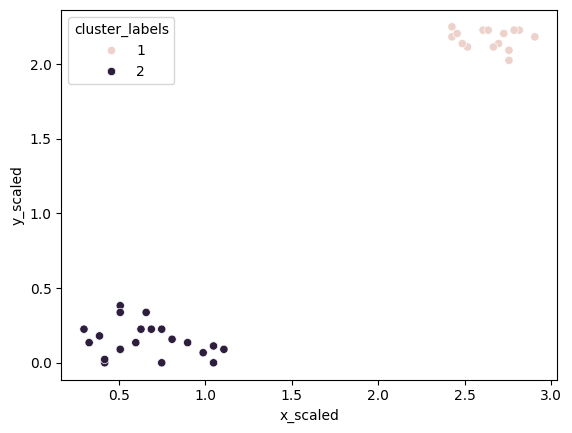

In [4]:
# Import the fcluster and linkage functions
from scipy.cluster.hierarchy import fcluster, linkage

# Use the linkage() function
distance_matrix = linkage(comic_con[['x_scaled', 'y_scaled']], method = "ward", metric = 'euclidean')

# Assign cluster labels
comic_con['cluster_labels'] = fcluster(distance_matrix, 2, criterion='maxclust')

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled',
                hue='cluster_labels', data = comic_con)
plt.show()

# Notice the two clusters correspond to the points of attractions in the figure towards the bottom (a stage) and the top right (an interesting stall).

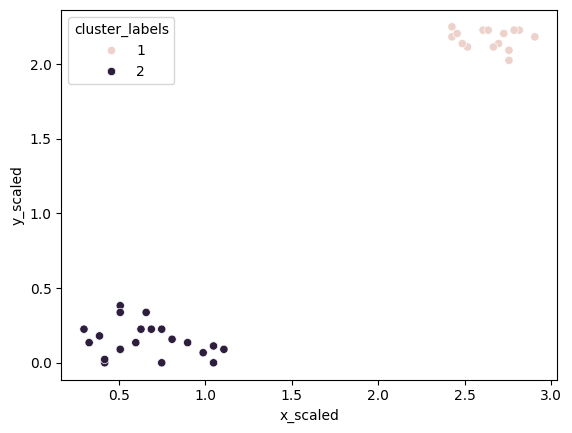

In [5]:
# Import the fcluster and linkage functions
from scipy.cluster.hierarchy import fcluster, linkage

# Use the linkage() function
distance_matrix = linkage(comic_con[["x_scaled", "y_scaled"]], method = "single", metric = 'euclidean')

# Assign cluster labels
comic_con['cluster_labels'] = fcluster(distance_matrix, 2, criterion='maxclust')

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled',
                hue='cluster_labels', data = comic_con)
plt.show()

# otice that in this example, the clusters formed are not different from the ones created using the ward method.

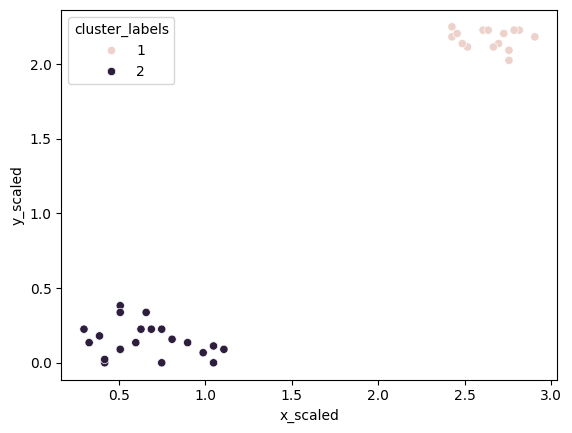

In [6]:
# Import the fcluster and linkage functions
from scipy.cluster.hierarchy import fcluster, linkage

# Use the linkage() function
distance_matrix = linkage(comic_con[["x_scaled", "y_scaled"]], method="complete", metric="euclidean")

# Assign cluster labels
comic_con['cluster_labels'] = fcluster(distance_matrix, 2, criterion="maxclust")

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled',
                hue='cluster_labels', data = comic_con)
plt.show()

#  Coincidentally, the clusters formed are not different from the ward or single methods. Next, let us learn how to visualize clusters.

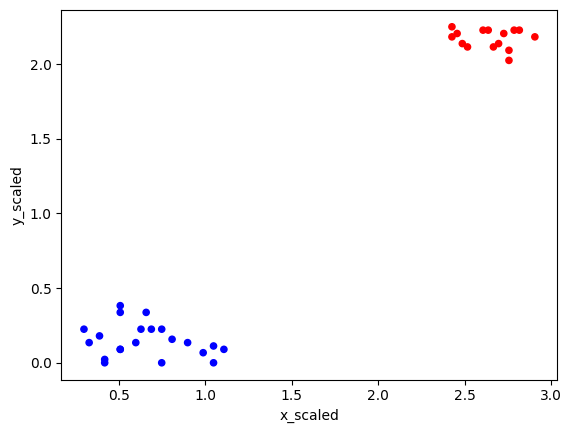

In [7]:
# Import the pyplot class
import matplotlib.pyplot as plt

# Define a colors dictionary for clusters
colors = {1:'red', 2:'blue'}

# Plot a scatter plot
comic_con.plot.scatter(x='x_scaled',
                	   y='y_scaled',
                	   c=comic_con['cluster_labels'].apply(lambda x: colors[x]))
plt.show()

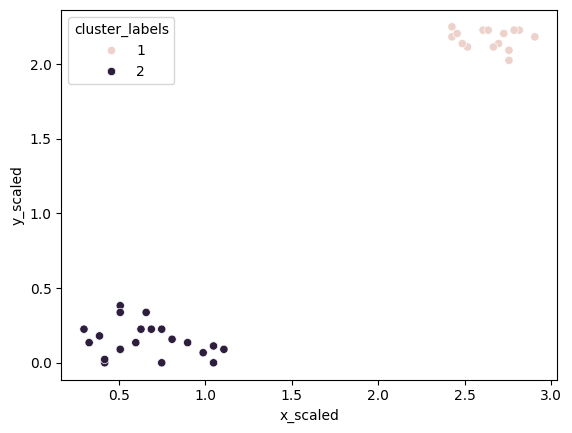

In [8]:
# Import the seaborn module
import seaborn as sns

# Plot a scatter plot using seaborn
sns.scatterplot(x="x_scaled",
                y="y_scaled",
                hue="cluster_labels",
                data = comic_con)
plt.show()

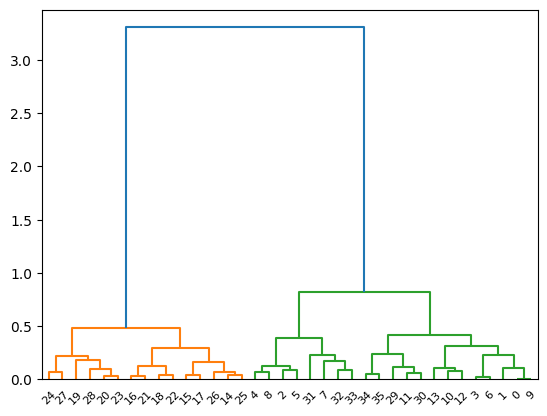

In [9]:
# Import the dendrogram function
from scipy.cluster.hierarchy import dendrogram

# Create a dendrogram
dn = dendrogram(distance_matrix)

# Display the dendrogram
plt.show()

# Notice the significant difference between the inter-cluster distances beyond the top two clusters.

### Limitation

**Timing run of hierarchical clustering**  
In earlier exercises of this chapter, you have used the data of Comic-Con footfall to create clusters. In this exercise you will time how long it takes to run the algorithm on DataCamp's system.

Remember that you can time the execution of small code snippets with:

    %timeit sum([1, 3, 2])
The data is stored in a pandas DataFrame, comic_con. x_scaled and y_scaled are the column names of the standardized X and Y coordinates of people at a given point in time. The timeit module and linkage function are already imported

How long does it take to the run the linkage function on the comic con data?

-> 1-5 miliseconds

### FIFA 18: exploring defenders
In the FIFA 18 dataset, various attributes of players are present. Two such attributes are:

sliding tackle: a number between 0-99 which signifies how accurate a player is able to perform sliding tackles
aggression: a number between 0-99 which signifies the commitment and will of a player
These are typically high in defense-minded players. In this exercise, you will perform clustering based on these attributes in the data.

**This data consists of 5000 rows, and is considerably larger than earlier datasets. Running hierarchical clustering on this data can take up to 10 seconds**.

The following modules are pre-loaded: dendrogram, linkage, fcluster from scipy.cluster.hierarchy, matplotlib.pyplot as plt, seaborn as sns. The data is stored in a pandas DataFrame, fifa.

,sliding_tackle,aggression
0,23,63
1,26,48
2,33,56
3,38,78
4,11,29


                sliding_tackle  aggression
cluster_labels                            
1                    62.336711   64.896142
2                    15.289588   28.012052
3                    28.439806   53.722328


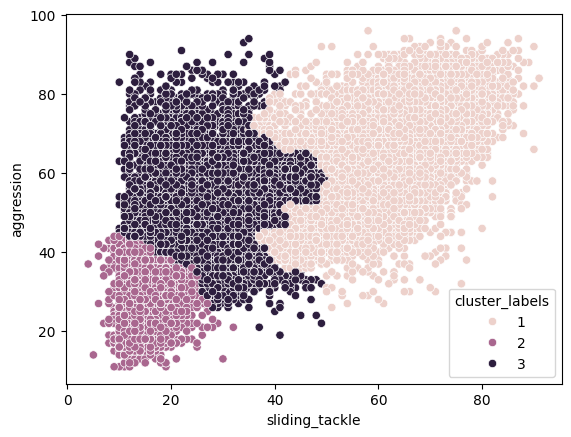

In [12]:
url = "https://raw.githubusercontent.com/Rohanrathod7/my-ml-labs/main/09_Cluster_Analysis_in_Python/dataset/fifa_18_sample_data.csv"
# Read the CSV file
# The original code tried to read a feather file as a CSV, and had a UnicodeDecodeError.
# The file extension is feather, so it should be read using pd.read_feather.
# Also, the variable name was confusing, it should be spotify_population.
fifa = pd.read_csv(url).apply(pd.to_numeric, errors='coerce')
display(fifa.head())

# Fit the data into a hierarchical clustering algorithm
distance_matrix = linkage(fifa[['scaled_sliding_tackle', 'scaled_aggression']], 'ward')

# Assign cluster labels to each row of data
fifa['cluster_labels'] = fcluster(distance_matrix, 3, criterion='maxclust')

# Display cluster centers of each cluster
print(fifa[['scaled_sliding_tackle', 'scaled_aggression', 'cluster_labels']].groupby('cluster_labels').mean())

# Create a scatter plot through seaborn
sns.scatterplot(x="scaled_sliding_tackle", y="scaled_aggression", hue="cluster_labels", data=fifa)
plt.show()

# Notice how long it took to run hierarchical clustering on a few thousand data points